In [43]:
 import sys
import pandas as pd
import numpy as np
import nltk
import os

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

from sqlalchemy import create_engine

import pickle
import matplotlib.pyplot as plt
from sklearn import multioutput
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shanm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shanm\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [5]:
def load_data():
        engine = create_engine('sqlite:///disastermessages.db')
        X, Y, category_names = load_data(engine)
        print(X)
        print(Y)
        return X,Y   


In [6]:
engine = create_engine('sqlite:///disastermessages.db')
df = pd.read_sql_table('disastermessage', engine)
df.head()
X = df.loc[:, 'message'].astype(str)
print(X)
Y = df.iloc[:, 4:].astype(str)
categories = list(Y)
print(categories)
display (Y.head (n=3))



0        Weather update - a cold front from Cuba that c...
1                  Is the Hurricane over or is it not over
2                          Looking for someone but no name
3        UN reports Leogane 80-90 destroyed. Only Hospi...
4        says: west side of Haiti, rest of the country ...
5                   Information about the National Palace-
6                           Storm at sacred heart of jesus
7        Please, we need tents and water. We are in Sil...
8          I would like to receive the messages, thank you
9        I am in Croix-des-Bouquets. We have health iss...
10       There's nothing to eat and water, we starving ...
11       I am in Petionville. I need more information r...
12       I am in Thomassin number 32, in the area named...
13       Let's do it together, need food in Delma 75, i...
14       More information on the 4636 number in order f...
15       A Comitee in Delmas 19, Rue ( street ) Janvier...
16       We need food and water in Klecin 12. We are dy.

,categories,0,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,33,34,35
0,related-1;request-0;offer-0;aid_related-0;medi...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,related-1;request-0;offer-0;aid_related-1;medi...,1,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,related-1;request-0;offer-0;aid_related-0;medi...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
engine = create_engine('sqlite:///disastermessages.db')
df = pd.read_sql_table('disastermessage', engine)
df.head()
X = df.loc[:, 'message'].astype(str)
print(X)
Y = df.iloc[:, 4:].astype(str)
categories = list(Y)
print(categories)
display (Y.head (n=3))

0        Weather update - a cold front from Cuba that c...
1                  Is the Hurricane over or is it not over
2                          Looking for someone but no name
3        UN reports Leogane 80-90 destroyed. Only Hospi...
4        says: west side of Haiti, rest of the country ...
5                   Information about the National Palace-
6                           Storm at sacred heart of jesus
7        Please, we need tents and water. We are in Sil...
8          I would like to receive the messages, thank you
9        I am in Croix-des-Bouquets. We have health iss...
10       There's nothing to eat and water, we starving ...
11       I am in Petionville. I need more information r...
12       I am in Thomassin number 32, in the area named...
13       Let's do it together, need food in Delma 75, i...
14       More information on the 4636 number in order f...
15       A Comitee in Delmas 19, Rue ( street ) Janvier...
16       We need food and water in Klecin 12. We are dy.

,categories,0,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,33,34,35
0,related-1;request-0;offer-0;aid_related-0;medi...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,related-1;request-0;offer-0;aid_related-1;medi...,1,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,related-1;request-0;offer-0;aid_related-0;medi...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\shanm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029558684780>,
      dtype=object)

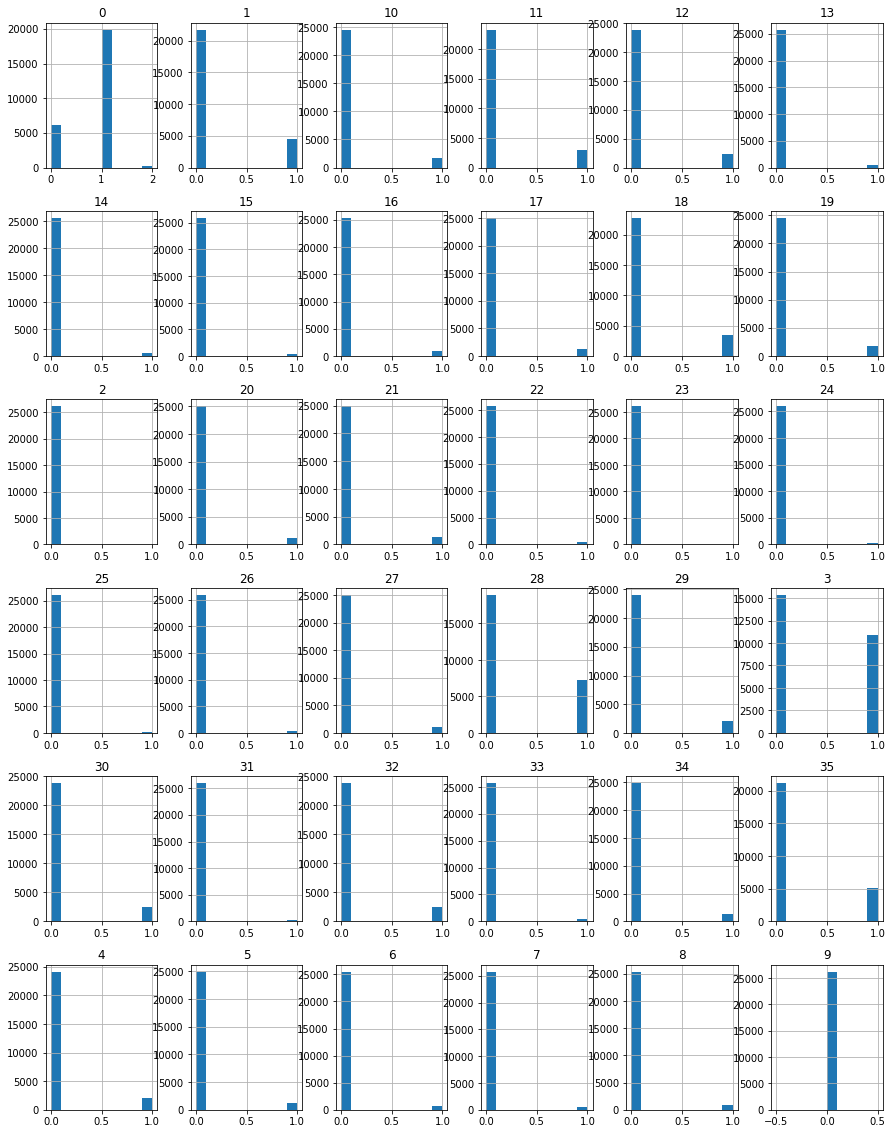

In [73]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
Y.hist(ax = ax)

In [25]:
df.head()


,id,message,original,genre,categories,0,1,2,3,4,...,26,27,28,29,30,31,32,33,34,35
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train = X_train.astype(str)
Y_train = Y_train.astype(str)
print(X_train)

12588    Mom is going to make me eat this Italian feast...
13666    The parched soil has not been able to absorb t...
11332    Sooooo .. .the house just shook a little . #wi...
8166     Allo united state i greeting sir and lady i as...
21705    Working with partners in healthcare, health de...
989      We need to continue to plant. We need to take ...
14513    The under-sea quake measuring up to 8.7 on the...
5716     I work in the civil engineering field. Where c...
1402     Est-ce que ya monde qui aller U. s. a et qui o...
14590    The Social Affairs Ministry has asked all char...
838      I live in Mariani, I no longer have a house. I...
14798    After soaking rains during the first ten days ...
11058    Want to help delvier supplies , debris removal...
17310    Senator Nilofer Bakhtiar, chairperson of the P...
10065    RT Gtrav2cool **VIEWER DISCRETION** Raw Footag...
19778    Stagnant water with high-level radioactivity i...
10247    RT operationSAFE RT anthonystevens4 Haiti Eart.

In [54]:
import nltk
model = build_model()
print('good')
pipeline.fit(X_train, Y_train)        
    




good


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...oob_score=False, random_state=None, verbose=0,
            warm_start=False),
           n_jobs=1))])

In [34]:
def tokenize(text):
    '''
    param: text
    return: list of tokens
    '''

    tokens = word_tokenize(text)
    wl = WordNetLemmatizer()
    # converting to lower case and lemmatize each token
    tokens = [wl.lemmatize(t).lower().strip() for t in tokens]

    return tokens

In [39]:
def build_pipeline_model():
    '''
    Builds the model pipeline
    param:parameters for RF model
    returns:pipeline
    '''

   #setting pipeline
    pipeline = Pipeline([
            ('vect', CountVectorizer(tokenizer=tokenize)),
            ('tfidf', TfidfTransformer()),
    #        ('clf', multioutput.MultiOutputClassifier (RandomForestClassifier(), n_jobs = 35))
            ('clf', multioutput.MultiOutputClassifier (RandomForestClassifier()))
            ])

    X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 25)
    
    return pipeline

In [20]:
def evaluate_pipeline_model(model, X_test, Y_test):
    """
    Evaluates model's performance on the test set.
    param : model
    param : X_test
    param : Y_test
    param : category_names
    return : None
    """
    predictions = model.predict(X_test)
    
    # Since there are 36 categories, we'll just loop over them to calculate the accuracy of each category.
    print("Accuracy scores for each category\n")
    print("*-" * 30)

    for i in range(36):
        print("Category:", category_names[i],"\n", classification_report(Y_test[:, i], predictions[:, i]))

In [16]:
def main():
        engine = create_engine('sqlite:///disastermessages.db')
        df = pd.read_sql_table('disastermessage', engine)
        X = df['message']
        Y = df.iloc[:,4:]
        print('Loading data...\n    DATABASE: {}'.format(engine))
        X, Y, category_names = load_data(engine)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

        print('Building random forest model with best parameters')
        model = build_pipeline_model()

        print('Training model...')
        model.fit(X_train, Y_train)
        
        print('Evaluating model...')
        evaluate_model(model, X_test, Y_test)

        print('Saving model...\n    MODEL: {}'.format(model_filepath))
        save_model(model, model_filepath)

        print('Trained model saved!')